In [0]:
%matplotlib inline
from google.colab import files

In [0]:
import matplotlib.pyplot as plt
import math
import numpy as np
np.random.seed(5)

In [0]:
import scipy.stats as stats
import random
import math
import pandas as pd


In [1]:
from sklearn import decomposition
from sklearn import datasets

# datasets
!pip install ggplot
from ggplot import mtcars
iris = datasets.load_iris()

    100% |████████████████████████████████| 2.2MB 530kB/s 


/usr/local/lib/python3.6/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Outline

**We intend for each topic has a TL;DR, then a more detailed definition and a coding example.**

- [Reference Material](#reference)
- [Math](#math)
- [Stats](#stats)
- [ML](#ml)
- [Applied ML](#appliedML)
- [Data](#data)




<a id='reference'></a>
# Reference Material

## General

- http://web.stanford.edu/~hastie/ElemStatLearn/
- https://github.com/josephmisiti/awesome-machine-learning/blob/master/books.md

## Linear Algebra and Probability
- http://www.deeplearningbook.org/contents/linear_algebra.html
- http://www.deeplearningbook.org/contents/prob.html
- https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf
- https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading18.pdf

## ML

- http://cs231n.github.io/linear-classify/

## Blogs and Posts

- http://cs231n.github.io/optimization-1/
- https://hamelg.blogspot.com/2015/12/python-for-data-analysis-index.html?view=sidebar
- http://colah.github.io/posts/2015-09-Visual-Information/
- http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf
- http://varianceexplained.org/r/bayesian-ab-testing/



<a id='math'></a>
# Math

## Linear Algebra Review

[chapter 2(dl book)](http://www.deeplearningbook.org/contents/linear_algebra.html) as reference


### Eigenvectors, Eigenvalues and Eigendecomposition

TLDR: A square matrix  $A$ can be described as a geometric transformation, and an eigenvector $v$ is transformed by that matrix only by a scaling parameter $\lambda$. So $Av = \lambda v$. You can use this property to decompose $A$ into several matrix multiplications.

#### Definition of eigenvector, eigenvalue



- An Eigenvector  $v$ of a square matrix $A$, when multiplied by $A$ only alters the scale of $v$. $\lambda$ is the eigenvalue corresponding to this eigenvector. 
- $$ \textbf{Av} = \boldsymbol\lambda \textbf{v}$$
- If $s  \epsilon R $ and $ s \neq 0 $, then $sv$ is also an eigenvector and has the same eigenvalue. 

#### Eigendecomposition

- The eigendecomposition of $\textbf{A}$ is:

$$ \textbf{A} = \textbf{V}diag(\boldsymbol\lambda)\textbf{V}^{-1}$$

Where

- $\textbf{A}$ has to be a square matrix. Every real symmetric matrix  $\textbf{A}$ can be decomposed into an expression using only real-valued eigenvectors and eigenvalues.
- Matrix $\textbf{A}$ has $n$ linearly independent eigenvectors { $\textbf{v}^{(1)}$, ...  $\textbf{v}^{(n)}$}, with corresponding eigenvalues {$\lambda^{(1)}$, ...  $\lambda^{(n)}$}. 

- matrix $\textbf{V}$ has all eigenvectors, one eigenvector per column, $\textbf{V} = [\textbf{v}^{(1)}, ...,  \textbf{v}^{(n)}]$.
- vector $\boldsymbol\lambda  = [\lambda^{(1)}, ..., \lambda^{(n)}]$, with all eigenvalues.

- Can think of A as scaling space by $\lambda_i$ in direction $v_i$ (think of a unit circle being scaled)

#### Definitions coming from eigendecomposition
- Eigendecomposition may not be unique. (only unique if all eigenvalues are unique).
- Matrix is **singular** if any of the eigenvalues are 0.
- Matrix is **positive definite** if all eigenvalues are positive
- Matrix is **positive semidefinite** if all eigenvalues are positive or 0.
     - This guarantees that $ \forall \textbf{x}, \textbf{x}^T\textbf{Ax}\geq0 $
- Matrix is **negative definite** if all eigenvalues are negative
- Matrix is **negative semidefinite** if all eigenvalues are negative or 0.



Let's look at a coding example with eigendecomposition:

In [5]:
X = iris.data
A = X.T.dot(X)  # a square matrix
V = np.linalg.eig(A)


# check that A v = lambda v
print('lambda * v', A.dot(V[1][:, 0]) / V[1][:, 0])
print('lambda', V[0][0])

lambda * v [9206.53059607 9206.53059607 9206.53059607 9206.53059607]
lambda 9206.530596067096


### SVD and PCA

TLDR: Other ways to decompose matrices.

#### Singular Value Decomposition

TLDR: if you can't do eigendecomposition on a matrix(i.e. matrix is not square) use SVD to decompose that matrix instead.

- Every real matrix has an SVD (e.g. if matrix is not square, eigendecomposition is undefined, so use SVD instead)
$$\textbf{A} = \textbf{UDV}^T $$
- $$\textbf{A}(mxn) = \textbf{U}(mxm)\textbf{D}(mxn)\textbf{V}^T(nxn) $$
- **U** and **V** are orthogonal (inner product is zero).
- **D** is diagonal and it's diagonal values are singular values of **A**, columns of **U** are left singular vectors (eigenvectors of $\textbf{AA}^T$), columns of **V** are right-singular vectors (eigenvectors of $\textbf{A}^T\textbf{A}$).
    - singular values are the eigenvalues of matrix $\sqrt{A^T A}$ or  $\sqrt{A A^T}$

#### Moore-Penrose Pseudoinverse:
To solve $\textbf{Ax = y}$, we want $\textbf{A}^{-1}$ which isn't possible if **A** is not square. We can use the Moore-Penrose pseudoinverse:
$$\textbf{A}^+ = \textbf{VD}^+\textbf{U}^T $$
where + indicaes pseudoinverse, **U, D, V** are from SVD of **A**
- $D^{+}$ is reciprocal of its nonzero elements, then transpose.

#### PCA

TLDR: PCA helps us lower the dimensionality of our data while keeping the most relevant information.

Use PCA to get a lower dimensional version of points that requires less memory, if it is okay to lose some precision.

$\textbf{X}$ is our data with shape $R^{m,n}$. We want a function to approximately encode $\textbf{X}$ to $\textbf{C} \in R^{m, l}$, where $l < n$. We can use $\textbf{D}$ to encode $\textbf{X}$ where $\textbf{D}^T\textbf{X} = \textbf{C}$ and $\textbf{D}$ is composed of the largest $l$ eigenvectors of $\textbf{X}^T\textbf{X}$.  $D \in R^{nxl}$.  
- D is unitary ($DD^T=I$) because eigenvectors are orthogonal and they are normalized.

---

*Derivation:*

- For each $ x^i \epsilon R^n$, find a corresponding code vector, $c^i \epsilon R^l$ (l < n for less memory)
- We want an encoding function $f(x) = c$, and a decoding function, $x \approx g(f(x))$
- Find D for $g(c) = Dc$ where $D \epsilon R^{nxl}$
- PCA constrains columns of D to be orthogonal to each other, and all columns of D to have unit norm (for unique solution)
- Find optimal $c^{*}$ for each x. Minimize distance between input point x and reconstruction g($c^{*}$) (measure this using L^2 norm):
  - $c* = \underset{c}{\operatorname{argmin}} \|x - g(c) \|_2^2$
  - ... expand, substitute g(c) and do optimization ...
  - $ c = D^T x $
  - $ f(x) = D^T x $
  - $ r(x) = g(f(x)) = D D^T x $
  - to find matrix D, solve this:
  - $D* = \underset{D}{\operatorname{argmin}} \sqrt{\underset{i,j}\sum(X_j^i - r(x^i)_j)}$, subject to $D^TD = I_l$
    - $X \epsilon R^{mxn}$ is all vectors stacked, $ X_{i,:} = X^{i^T}$
    - When l = 1, D is just a vector, d, and you get $ \underset{d}{\operatorname{argmax}} Tr(d^TX^TXD)$ subject to $d^Td=1$, and optimization problem can be solved using eigendecomposition.
    - Optimal d is given by eigenvector of $X^TX$, corresponding to largest eigenvalue.

#### PCA Coding Example

In [84]:
# Get PCA with 2 components from Iris Data using sklearn
X = iris.data

pca = decomposition.PCA(n_components=2, svd_solver='full')
pca.fit(X)
C = pca.transform(X)
D = pca.components_.T

print('X shape is ', X.shape)
print('C shape is ', C.shape)
print('D shape is ', D.shape)

X shape is  (150, 4)
C shape is  (150, 2)
D shape is  (4, 2)


In [142]:
# Do it manually by getting eigendecomposition of X^T X
Xm = X - X.mean(axis=0)
d = np.linalg.eig(Xm.T.dot(Xm))

# get top 2 eigenvalues
D1 = d[1][:, :2]

C1 = Xm.dot(D1)

print('Actual X[0]', X[0])
print('Sklearn reconstruction', C.dot(D.T)[0] + X.mean(axis=0))
print('Numpy reconstruction', C1.dot(D1.T)[0] + X.mean(axis=0))

Acutal X[0] [ 5.1  3.5  1.4  0.2]
Sklearn reconstruction [ 5.08718247  3.51315614  1.4020428   0.21105556]
Numpy reconstruction [ 5.08718247  3.51315614  1.4020428   0.21105556]


## Probability  Review
[chapter3(dl book)](http://www.deeplearningbook.org/contents/prob.html) as reference

#### Variance/Covariance Equations:

TLDR: Variance is the expected squared distanec from each point to the mean.

$Var(f(x)) = E[ (f(x) − E[f(x)])^2 ] $

$stdev = \sqrt(Var) $

$Cov(f(x), g(y)) = \mathrm{E}[ (f(x) - \mathrm{E}[f(x)]) (g(y) - \mathrm{E}[g(y)]) ]$
 - 2 independent variables have 0 covariance.
 - 2 variables with non-zero covariance are dependent.
 - 2 dependent variables can have 0 covariance.

In [147]:
# Compute covariance with numpy

X = iris.data

print(np.mean((X - np.mean(X, axis=0)) ** 2, axis=0))

print(np.std(X, axis=0) ** 2)

[ 0.68112222  0.18675067  3.09242489  0.57853156]
[ 0.68112222  0.18675067  3.09242489  0.57853156]


### Baye's Formula

TLDR: A formula for conditional probability distributions

The probability of getting a model with parameters $\theta$ given an observation $x$, based on prior beliefs $p(\theta)$ of the model parameters is: 

$$ P(\theta|x) = \frac{P(x|\theta)P(\theta)}{P(x)}$$

- $P(\theta)$ is the prior, initial belief in $\theta$
- P($\theta$| x) is the posterior, probability of getting a model $\theta$ given an observation $x$
- P(x|$\theta$) is the likelihood of seeing an observation $x$ given your model $\theta$

### Common Probability Distributions

#### Uniform Distribution

TLDR: Flat distribution over a specified interval.

$$
\begin{equation}
  P(x)=\begin{cases}
    0, & \text{if $x<a$}.\\
    \frac{1}{b - a}, & \text{if $a \le x \le b$}\\
    0, & \text{if $x > b$}.
  \end{cases}
\end{equation}
$$

- It is a maximum entropy distribution given a specified interval over real numbers.

#### Bernoulli distribution

TLDR: think of a coin

  - Single binary R.V.
  - $\phi \in [0,1]$
  - $P(x=1) = \phi $
  - $P(x=0) = 1 - \phi$
  - $P(x = x) = \phi^x(1-\phi)^{1-x}$
  - $\mathrm{E}_X[x] = \phi$
  - $\mathrm{Var}_X(x) = \phi(1-\phi) $

#### Multinomial distribution

TLDR: think of dice

  - Categorical. Single discrete variable with k different states (k is finite)
  - $\textbf{p} \in [0,1]^{k-1}$ where $p_i$ is the $i$th state's probability.
  - $k$th state probability given by $1- \textbf{1}^T\textbf{p}$, $\textbf{1}^T\textbf{p} \leq 1$
 

#### Gaussian Distribution and Central Limit Theorem

TLDR: Has a mean and variance, for continuous random variables, and it approximates a ton of other distributions because of the Central Limit Theorem.

$$P(x)  = \frac{1}{{\sigma \sqrt {2\pi } }} e^{ -(x - \mu)^2 / (2 \sigma^2) }$$

- Central Limit Theorem - the sum of many independent random variables is approximately normally distributed. 
- Out of all possible probability distributions over real numbers with a specified variance, the normal distribution encodes the maximum amount of uncertainty. In other words, it's a maximum entropy distribution.

#### Exponential and laplace distribution

TLDR: often want a sharp point at x = 0

- Exponential Distribution:
$$p(x;\lambda) = \lambda \textbf{1}_{x\geq0}\exp(-\lambda x)$$
- Laplace Distribution
$$ Laplace(x; \mu, \gamma) = \frac{1}{2\gamma} \exp(-\frac{| x - \mu |}{\gamma})$$



#### Dirac and Empirical distribution

You can make an empirical distribution by putting all the mass in a probability distribution around the actual points of the data.

- Dirac delta function:
$$ p(x) = \delta(x - \mu) $$
  - zero everywhere except 0
  - infinitely narrow peak where $x = \mu$
  - Empirical distribution (common use of Dirac delta distribution)
  $$ p(\textbf{x}) = \frac{1}{m} \sum_{i=1}^m \delta(\textbf{x} - \textbf{x}^{(i)})$$
  - Used to define empirical distribution over continuous variables.
  - For discrete variables, empirical distribution is a multinoulli distribution, where probability of each input value is the empirical frequency in the training set.
  - Empirical distribution is the probability density that maximizes the likelihood of the training data.

#### Mixtures of Distributions:

TLDR: break up a distribution instead several smaller ones

- Made up of several component distributions
- For example, we could first sample a component identity $P(c)$ from multinoulli distribution, which tells us which distribution to sample from $P(x|c)$.
$$ P(x) = \sum_iP(c=i)P(x|c = i) $$
  - P(c) is the multinoulli distribution over component identities

**Latent variable**
- Random variable that we can't observe directly
- above, $c$ is an example. 
- Latent variables are related to x through joint distribution, i.e. $ P(x,c) = P(x|c)P(c)$

**Gaussian mixture model (GMM)**

TLDR: A model consisting of several gaussian distributions.

- $p(\textbf{x}|c=i)$ are Gaussians.
- Each component has separately parametrized $\mathbf{\mu}^{(i)}$ and $\mathbf{\Sigma}^{(i)}$
- Parameters also specify prior probability: $\alpha_i = P(c=i)$ given to each component $i$ (prior because it is the model's belief about c before it has observed x.)
- $P(c|\textbf{x})$ is a posterior probability
- This is a universal approximator of densities (any smooth density can be approximated with a gmm with enough components.)


### Common functions and useful properties:


#### Logistic Sigmoid

Sigmoid converts a real number $\in (-\inf, \inf)$ to a probability $\in [0, 1]$.

$$\sigma(x) = \frac{1}{1 + \exp{(-x)}} $$


The inverse of the sigmoidal function is the logit function $log(\frac{p}{1 - p})$.

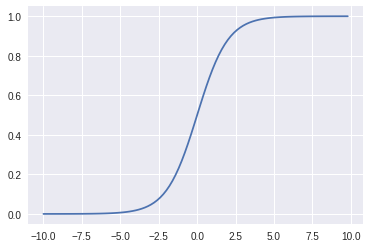

In [31]:
def sigmoid(x):
  y = []
  for item in x:
    y.append(1/(1 + math.exp(-item)))
  return y

x = np.arange(-10, 10, 0.2)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

#### Softplus Function:

$$\varsigma(x) = log(1 + \exp(x))$$, sometimes used as an activation function in neural nets.

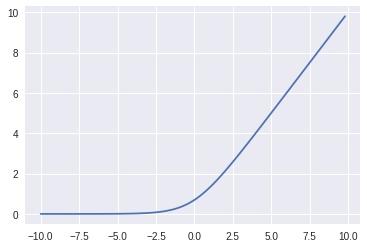

In [34]:
 def soft_plus(x):
    y = []
    for item in x:
      y.append(math.log(1 + math.exp(item)))
    return y
  
x = np.arange(-10, 10, 0.2)
y = soft_plus(x)
plt.plot(x, y)
plt.show()

#### Properties of Sigmoid ($\sigma$) and Softplus ($\varsigma$):
$$\sigma(x) = \frac{\exp{(x)}}{\exp{(x)} +  \exp{(0)}} $$

$$\frac{d}{dx} \sigma(x) = \sigma(x)(1-\sigma(x)) $$

$$ 1 - \sigma(x) = \sigma(-x)$$

$$ log\sigma(x) = -\varsigma(-x) $$

$$\frac{d}{dx}\varsigma(x) = \sigma(x)$$

$$\forall \in (0,1), \sigma^{-1}(x) = log(\frac{x}{1-x})$$

$$\forall > 0, \varsigma^{-1}(x) = log(\exp(x) - 1)$$

$$ \varsigma(x) = \int_{-\infty}^{x} \sigma(y)dy $$

$$ \varsigma(x) -  \varsigma(-x) = x$$

- This last one is similar to identity $x^+ - x^- = x $

## Information Theory

http://colah.github.io/posts/2015-09-Visual-Information/

http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf




#### Self-information

$$I(x) = -logP(x)$$

#### Entropy

TLDR: Used to quantify the uncertainty in a probability distribution or the minimum number of bits to encode events from a probability distribution.

$$H(X) = \mathrm{E}_{X \sim P} I(x) = - \sum_{i= 1}^n P(x_i)log(P(x_i)) $$


#### KL Divergence

TLDR: Measure the difference between 2 probability distribution with the same random variable.

Random variable $x$, and 2 probability distributions P(x), Q(x)

$$ D_{KL}(P \parallel Q) = \mathrm{E}_{X \sim P}[ \ log \frac{P(x)}{Q(x)} ] =  \sum_i P(x_i) log(\frac{P(x_i)}{Q(x_i)}) $$
- measures difference between 2 distributions: the extra information sent if we sent a message with symbols drawn from distribution P using code that minimized the length of messages drawn from distribution Q
- Difference between cross-entropy and entropy.
- Not a distance measure, not symmetric, i.e. $ D_{KL}(P \parallel Q) \neq D_{KL}(Q \parallel P) $


#### Cross Entropy

TLDR: Measures the number of bits needed if we encode events from P using the wrong distribution Q.

$$H(P, Q) = -\sum_{i=1}^n P(x_i) log(Q(x_i))$$
$$H(P,Q) = H(P) +  D_{KL}(P \parallel Q)$$

- If $P$ and $Q$ are the same distribution, we just get entropy.
- Cross-entropy loss for random guesses in a binary classifier is $-log(0.5)\approx0.693$. In this case $P$ are the ground truth labels and $Q$ is our model's predictions.
- minimizing cross-entropy is the same as minimizing KL divergence.

#### Graphical Models
TLDR: factorization of a probability distribution using a graph

- We can split up a probability distribution into many factors, like:
$$ p(a,b,c) = p(a)p(b|a)p(c|b)$$
- The factorization of a probability distribution with a graph is called a graphical model
- directed and undirected models (use directed and undirected graphs respectively)
  - Directed Models:
      - factorizations into conditional probability distributions:
      $$ p(\textbf{x}) = \prod_{i}p(x_i|Pa_\zeta(x_i)) $$
      - $Pa_\zeta(x_i)$ are the parents of $x_i$
      ![Directed Graph](https://drive.google.com/uc?id=1ehrqV9YZ1gRO341FZtevjZBryvy0gJLH)
  - Undirected Models:
      - factorizations into a set of functions(usually not probability distributions)
      - set of nodes that are all connected to eachother in $\zeta$ is called a clique, $C^{(i)}$.
      - Each clique, $C^{(i)}$ is associated with a factor $\phi^{(i)}(C^{(i)})$. These are functions, non-negative, but don't have to sum to 1 like a probability distribution.
      - Beacuse they don't sum to 1, we use a normalization constant $Z$.
      $$p(\textbf{x}) = \frac{1}{Z} \prod_{i} \phi^{(i)}(C^{(i)})$$
      ![Undirected Graph](https://drive.google.com/uc?id=142uvmDtEUc19orY_HKdwfVwI2X6_6ad5)

      

## Numerical Methods
[chapter4(dl book)]
(http://www.deeplearningbook.org/contents/numerical.html)

http://cs231n.github.io/optimization-1/

#### Directional Derivative 




### Convex Optimization

#### Newton's method

#### Simplex Algorithm - Linear Programming

#### Quadratic Programming


### Non-convex Optimization

#### Finite Differences
#### Gradient Descent
#### Conjugate Gradient
#### BFGS
#### Hessian
#### Genetic Algorithms
#### Differential Evolution

<a id='statistics'></a>
# Statistics

## Sampling Statistics



### Population Statistics


#### Mean & Median
- Mean: Sum of values divided by number of values.
- Median: Middle value of sorted values, the 50th percentile.  This is a more robust statistic than mean, because it tends to resist effects of skew or outliers.

In [0]:
# change the index from numbers to the name of the car
mtcars.index = mtcars['name']

In [11]:
# Mean:
mtcars.mean(axis=0) # mean of each column
mtcars.mean(axis=1) # mean of each row
mtcars.median(axis=0) # median of column

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64


#### Quantiles
q-Quantiles partition your data into q subsets of (nearly) equal sizes. The median is the 2nd quantile of your data.
 you can get the 25% (1st quantile), 75% (3rd quantile)

In [36]:
# Defined as the 'five num' summary:

five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

print(five_num)

# IQR(Interquartile range) is a measure of spread (upper quartile-lower quartile
# 4-quantiles are called quartiles):
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

[10.4, 15.425, 19.2, 22.8, 33.9]


7.375

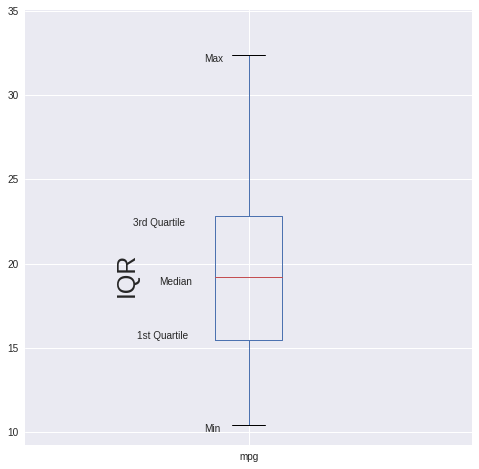

In [39]:
# A boxplot plots these quantities, i.e.
mtcars.boxplot(column='mpg', return_type='axes', figsize=(8,8))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=32, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)
plt.show()

#### Skew & Kurtosis
*Skewness* is the measure of skew or asymmetry of a distribution, and *kurtosis* measures the 'peakedness'.


- Mean, Variance, and Standard Deviation are all susceptible to influece of skew and outliers.

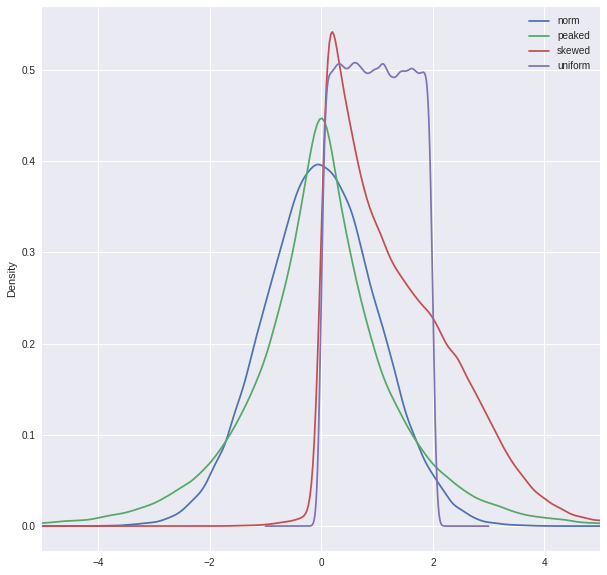

In [42]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})


data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5))
plt.show()

In [47]:
print('skew of graphs')
print(data_df.skew())
print('\n')
print('kurtosis of graphs')
print(data_df.kurt())

skew of graphs
norm       0.012523
peaked    -0.030491
skewed     1.004339
uniform    0.005870
dtype: float64


kurtosis of graphs
norm       0.004622
peaked     2.861855
skewed     1.276163
uniform   -1.199963
dtype: float64


#### Correlation
A measure of dependence between 2 quantities.

Pearson correlation coefficient:
$$\rho_{X,Y} = corr(X, Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y} = 
\frac{E [ (X-\mu_X) (Y-\mu_Y) ] } {\sigma_X \sigma_Y}  $$

equals +1 in perfectly increasing linear relationship, equals -1 in perfectly decreasing linear relationship. It cannot exceed 1.



In [12]:
# Computes all pairwise correlation scores
mtcars.corr(method='pearson')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [13]:
mpg = mtcars['mpg']
cyl = mtcars['cyl']

cov_mc = np.mean((mpg - np.mean(mpg))* (cyl - np.mean(cyl)))
cov_mc/(np.std(mtcars['mpg']) * np.std(mtcars['cyl']))

-0.85216195942661332

### Sampling

#### Point Estimates and Sampling

TLDR:

- Population statistics are for an entire dataset. You don't really need anything fancy since you have the whole dataset already!
- Sample statistics are for a sample of the population. You need fancy statistics since you need to adjust for bias from sampling in order to reflect statistics of the entire population.

The sample mean is an unbiased estimator of the population mean. Let's get samples from a population with a population mean $\mu$. Our samples are $X_1, X_2, ... , X_n$ and the sample mean is $E[X] = \bar{X}$. The expectation of our sample mean, if we were to sample many times from the population, is $E[\bar{X}] = \mu$. See the derivation [here](https://onlinecourses.science.psu.edu/stat414/node/167).

Let's make some fake data below, and see that re-sampling many samples from a population and taking the sample mean gives us an unbiased estimator of the population mean.



In [51]:
np.random.seed(3)

mu = 10
sigma = 3
sample_size = 8
population_size = 50000
population = np.random.normal(mu, sigma, size=population_size)
sample_means = []

for _ in range(10000):
  sample = population[np.random.randint(0, len(population), sample_size)]
  sample_means.append(np.mean(sample))
  

print('Mean of sample means is', np.mean(sample_means), 'and the true mean is', mu)
print('Standard deviation of sample means is ', np.std(sample_means))
print('Theoretical standard deviation of sample means is', np.sqrt(sigma**2 / sample_size))


Mean of sample means is 9.9933643506 and the true mean is 10
Standard deviation of sample means is  1.05264195357
Theoretical standard deviation of sample means is 1.06066017178


In the example above, we calculate the variance around our sample mean $\bar{X}$, which seems quite high at 1.053. This is because the variance around our sample mean depends on the sample size (i.e. if we sampled the whole population, the variance around our sample mean would be 0, since the sample mean would equal the population mean). We can calculate the variance around our sample mean as such:

$$
\begin{aligned}
Var(\bar{X}) &= Var(\frac{X_1 + X_2 + ... + X_n}{n}) \\
&= Var(\frac{X_1}{n} + \frac{X_2}{n} +... + \frac{X_n}{n})\\
&= \frac{Var(X_1)}{n^2} + \frac{Var(X_2)}{n^2} +... + \frac{Var(X_n)}{n^2}\\
&= \frac{1}{n^2} [\sigma^2] n\\
&= \frac{\sigma^2}{n}
\end{aligned}
$$

We validated this formula in the example above. In summary, the variance of our sample mean is $Var(\bar{X}) = \frac{\sigma^2}{n}$.



What if we now take standard deviations of our samples to estimate the population standard deviation? Is it unbiased?



In [6]:
np.random.seed(3)

mu = 10
sigma = 3
sample_size = 15
population_size = 50000
population = np.random.normal(mu, sigma, size=population_size)
sample_stds = []
unbiased_sample_stds = []

for _ in range(10000):
  sample = population[np.random.randint(0, len(population), sample_size)]
  sample_stds.append(np.std(sample))
  unbiased_sample_stds.append(np.std(sample, ddof=1)**2)
  

print('Mean of sample stds is', np.mean(sample_stds), 'and the true std is', sigma)
print('Mean of unbiased sample stds is', np.sqrt(np.mean(unbiased_sample_stds)))


Mean of sample stds is 2.8458362328361426 and the true std is 3
Mean of unbiased sample stds is 2.9987127401285933


We see in the example above that sample standard deviations are very far from the true standard deviation! 

This is because standard deviation is a biased estimator of the population standard deviation. An unbiased estimator of the population standard deviation is the **sample standard deviation**:

$$s_N = \sqrt{\frac{1}{N - 1} \sum_{i=1}^{N} (x_i - \bar{x})^2}$$

See [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) for a derivation.




#### Confidence Intervals Around Sample Mean

TLDR: You should add a margin of error to your point estimate to create a "confidence interval."

##### Known Population Standard Deviation

We saw above that the standard deviation of a sample mean scales as $\frac{\sigma}{\sqrt{n}}$. If we assume that the sample means are normally distributed (i.e. $\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt(n)}} \sim N(0,1)$, which is a reasonable assumption for large $n$ due to the Central Limit Theorem), we can calculate our confidence interval as $z * \frac{\sigma}{\sqrt{n}}$

where $z$ ($z$-critical value) is the number of standard deviations you would have to go from the mean to capture the proportion of data equal to your confidence interval. $\sigma$ is of the population, and $n$ is your sample size.

Let's get a 95% confidence interval for the mean sample age point estimate:


In [7]:
#create population
population1 = stats.poisson.rvs(mu=35, size=50000)
population2 = stats.poisson.rvs(mu=35, size=100000)
population = np.concatenate((population1, population2))
print('actual population mean', population.mean())


np.random.seed(5)
sample_size = 500
sample_ages = np.random.choice(a=population, size=sample_size)
sample_mean = sample_ages.mean()
print('sample mean', sample_mean)

# 2 tailed distribution, so to get a 95% confidence interval, we need to use 97.5%

z = stats.norm.ppf(q=.975)
moe = z * (population.std() / math.sqrt(sample_size))
print('margin of error', moe)
print('95th% confidence interval:', (sample_mean - moe, sample_mean + moe))


actual population mean 35.006366666666665
sample mean 34.834
margin of error 0.5186390573204052
95th% confidence interval: (34.3153609426796, 35.35263905732041)


In this case, the actual mean lies within the confidence interval. If we sampled the population $m$ times with the same confidence level of 95%, we should expect the actual mean to fall outside of the confidence interval of the sample mean 5% of the time.

----

##### Uknown Population Standard Deviation

https://onlinecourses.science.psu.edu/stat414/node/199

*If you **don't** know $\sigma$ of the population*, you can replace the population standard deviation $\sigma$ with the unbiased sample standard deviation $s$ to estimate your confidence interval around the sample mean. Previously we assumed that $\frac{X - \mu}{\frac{\sigma}{\sqrt(n)}} \sim N(0,1)$, to get our confidence intervals. Now we have $\frac{X - \mu}{\frac{s}{\sqrt(n)}}$ instead, which turns out to follow the [T-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution).

So we can use the $t$-critical value to create our confidence interval around the sample mean. The $t$ value is drawn from the $t$-distribution. The $t$-distribution is symmetric and bell-shaped like the normal distribution but has heavier tails (wider, so more likely to produce values that fall far from it's mean).


In the example below, we show how to use the t-distribution to get a confidence interval around a sample mean with unknown $\sigma$ of the population.

In [0]:
sample_size = 50
sample_ages = np.random.choice(a=population, size=sample_size)
sample_mean = sample_ages.mean()

In [44]:
# actually, we are getting t for q = .975 and q = .025
# we are actually doing mu + moe(q=0.025) and mu + moe (q=0.975)
t = stats.t.ppf(q=.975, df=sample_size - 1)
sample_stdev = np.std(sample_ages, ddof=1)
moe_t = t * (sample_stdev / math.sqrt(sample_size))

print('margin of error with t value', moe_t)
print('confidence interval:', (sample_mean - moe_t, sample_mean + moe_t))
print('population mean', population.mean())

margin of error with t value 1.840016072380871
confidence interval: (33.11998392761913, 36.80001607238087)
population mean 35.006366666666665


*As sample size increases, the t-distribution approaches the normal distribution.

----

##### Examples

How do you know how many samples to take to estimate a sample mean?

Let's look at an example: let's say I know the standard deviation of some true population statistic to be 1, how many samples do I need so that I'm 95% sure my sample mean is within 0.1 of the actual mean?


In [48]:
# you want your confidence interval to be within .1 unit of the actual mean
moe = 0.1
# for 95% confidence interval:
z = stats.norm.ppf(q=.975)

# moe = z * (sigma/sqrt(n))
# so, n = (z * sigma / moe)^2
sigma = 1

print('The number of samples would be ', ((z * sigma) / moe) ** 2)

The number of samples would be  384.14588206941244


In [49]:
# Let's show that this sample size gives us the correct confidence interval
mu = 2
sigma = 1
sample_size = 384
population = np.random.normal(mu, sigma, 5000)

sample_mean = []
for _ in range(10000):
  sample = population[np.random.randint(0, len(population), sample_size)]
  sample_mean.append(np.mean(sample))

print('Sampled 95% confidence interval', np.percentile(sample_mean, 2.5), np.percentile(sample_mean, 97.5))
print('Sample mean is: ', np.mean(sample_mean))

Sampled 95% confidence interval 1.89703332080055 2.0990285951801337
Sample mean is:  1.9972105309953014


#### Bootstrapping Point Estimates with Confidence Intervals

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading24.pdf

TLDR: If our data is drawn from some unknown distribution $F$ with unknown mean $\mu$, and we use a sample mean $\bar{x}$ as a point estimate of $\mu$, we can use the ***empirical bootstrap*** to find a confidence interval around $\bar{x}$.

**Resampling**:
Label your data, $x_1,x_2,...x_n$ by drawing a number j from the uniform distribution on {$1, 2, ..., n$}, and take $x_j$ as your resampled value. We sample with replacement.

**Bootstrap Setup:**
1. $x_1,x_2...x_n$ is a data sample from distribution $F$
2. $u$ is a statistic computed from this sample
3. $F^*$ is the resampling distribution
4. $x_1^*,x_2^*...x_n^*$ is the resampled data. (Think of this as a sample size $n$ being drawn from $F^*$)
5. $u*$ is the statistic computed from the resample.

**The bootstrap principle says:**
1. $F^* \approx F $
2. The variation of $u$ is well approximated by the variation of $u^*$

We use step 2 of the bootstrap principle to estimate the size of the confidence intervals. See the link above for a justification.

**Example**: Sampled data is $[30, 37, 36, 43, 42, 43, 43, 46, 41, 42]$. Estimate the mean $\mu$ of the underlying distribution and give an 80% bootstrap confidence interval.

Sample mean $\bar{x}=40.3$. We want to know the distribution of $\delta = \bar{x} - \mu$ which we can approximate using $\delta^* = \bar{x}^* - \bar{x}$, where $\bar{x}^*$ is the mean of an emperical bootstrap sample.


In [0]:
# 1. Perform resampling:
sample_data = np.array([30,37,36,43,42,43,43,46,41,42])
x_bar = np.mean(sample_data)

# Let's perform 100 bootstrap samples
bootstrap_samples_n = 100
bootstrapped_x_bars = []
for n in range(bootstrap_samples_n):
  resample_idx = np.random.randint(0, len(sample_data), len(sample_data))
  bootstrapped_x_bars.append(np.mean(sample_data[resample_idx]))

bootstrapped_x_bars = np.sort(bootstrapped_x_bars)
delta_star = bootstrapped_x_bars - x_bar

In [11]:
# 2. Now we can get the 80th percentile of delta_star distribution
lower_bound_int = delta_star[int(bootstrap_samples_n * .1) - 1]
upper_bound_int = delta_star[int(bootstrap_samples_n * .9) - 1]
print('confidence interval is: ', [x_bar + lower_bound_int, 
                                   x_bar + upper_bound_int])

confidence interval is:  [1.5612398911159096, 1.9277749920844274]


$*$ By the law of large numbers, we could increase the number of bootstrap samples to get a more and more accurate estimate.

- The bootstrap is based on the law of large numbers, which says that with enough data, the empirical distribution will be a good approximation of the true distribution.

- Resampling doesn't improve our point estimate.

- The distribution of $\delta = \bar{x} - \mu$ describes the variation of $\bar{x}$ about its center, and distribution of $\delta^* = \bar{x}^* - \bar{x}$ describes the variation of $\bar{x}^*$ about its center. So, even if the centers $x$ and $\mu$ are different, the variations of the two centers can be approximately equal.




#### Stratified Sampling

This is a sampling method where the population is divided into separate groups (strata) so that each strata is a good representation of that strata in the whole population. 
- In proportion allocation, each sampled strata has equal proportions to that of the strata in the total population.


#### Rejection Sampling

#### Importance Sampling

#### Reservoir Sampling

- https://en.wikipedia.org/wiki/Reservoir_sampling
- https://gregable.com/2007/10/reservoir-sampling.html

TLDR: A way to sample streaming data uniformly without wasting memory.

For example, if I have a twitter stream, how do I sample 100 tweets uniformly, if I only have enough storage for 100 tweets?

First, we fill our reservoir (that holds only 100 tweets) with the first 100 tweets. Next, we'll want to process the 101th, 102nd,... nth tweet such that after processing, the 100 elements in the reservoir are randomly sampled amongst all the tweets we've seen so far.

*Solution:*
- When the 101st item arrives, we need the probability of keeping any element we've seen so far to be $\frac{100}{101}$. That means that we need to get rid of the 101st element with probability $\frac{1}{101} = 1 - \frac{1}{101}$.
- We also need the probabilty of getting rid of any item in the reservoir to be $\frac{1}{101}$, which can be done with:

P(101th element getting selected) * P(element in reservoir getting chosen as replacement) $$ = \frac{100}{101}*\frac{1}{100}= \frac{1}{101}$$


That means that:

- For the ith round, the probability we keep the ith item coming in is $\frac{100}{i}$. The probability any element will be removed from the reservoir in that round is $\frac{1}{i}$, and the probability we will keep any item is $\frac{100}{i}$.

In [0]:
from collections import Counter
import numpy as np

In [0]:
def reservoir_alg(res_capacity=10, stream_size=100):
  # For this example, let's say the reservoir is already filled to capacity
  reservoir = []
  for i in range(1, stream_size):
    if i <= res_capacity:
      reservoir.append(i)
    else:
      # Do reservoir sampling:
      j = np.random.randint(1, i + 1)
      if j <= res_capacity:
        # remove j element and replace with i
        reservoir[j - 1] = i
  return reservoir

In [0]:
# Now let's run this 10,000 times and see if we get uniform distribution
# over the 100 items we see in total
counts = Counter()
num_sim = 10000
for i in range(num_sim):
  reservoir = reservoir_alg()
  counts.update(reservoir)

# We expect the counter to show that each number in stream_size
# has an equal probability of occuring:
probs = {x:counts[x] / num_sim for x in counts}

In [16]:
# Indeed we see that each has a ~1/stream_size probability of occuring!
probs

{1: 0.0985,
 2: 0.1017,
 3: 0.1012,
 4: 0.0975,
 5: 0.0997,
 6: 0.0992,
 7: 0.0975,
 8: 0.1009,
 9: 0.1061,
 10: 0.1024,
 11: 0.102,
 12: 0.0988,
 13: 0.1007,
 14: 0.1024,
 15: 0.103,
 16: 0.1027,
 17: 0.1003,
 18: 0.1006,
 19: 0.103,
 20: 0.102,
 21: 0.0981,
 22: 0.1021,
 23: 0.1002,
 24: 0.0986,
 25: 0.1028,
 26: 0.099,
 27: 0.1024,
 28: 0.0993,
 29: 0.1033,
 30: 0.1034,
 31: 0.1022,
 32: 0.1046,
 33: 0.0978,
 34: 0.0984,
 35: 0.0989,
 36: 0.1007,
 37: 0.1058,
 38: 0.1017,
 39: 0.1053,
 40: 0.1038,
 41: 0.1006,
 42: 0.1054,
 43: 0.0988,
 44: 0.1046,
 45: 0.0943,
 46: 0.1009,
 47: 0.097,
 48: 0.1018,
 49: 0.1036,
 50: 0.0921,
 51: 0.1003,
 52: 0.0996,
 53: 0.1056,
 54: 0.0998,
 55: 0.1004,
 56: 0.0988,
 57: 0.0993,
 58: 0.0999,
 59: 0.1032,
 60: 0.1016,
 61: 0.0987,
 62: 0.1019,
 63: 0.1037,
 64: 0.1012,
 65: 0.1003,
 66: 0.1022,
 67: 0.0975,
 68: 0.1002,
 69: 0.0975,
 70: 0.1003,
 71: 0.1025,
 72: 0.1076,
 73: 0.105,
 74: 0.1019,
 75: 0.0987,
 76: 0.0976,
 77: 0.1014,
 78: 0.1013,
 7


## Significance Testing:

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading18.pdf

TLDR: Signficance Testing helps us test if data we collect matches some hypothesis about the data.

In other words, Significance Testing helps us test if our data is in the region we expect under some default assumption called the Null Hypothesis (or Null Distribution). If the data is significantly outside the Null Distribution, we reject the Null Hypothesis.

Terms:

- $H_0$ Null Hypothesis: default assumption. This is usually a Hypothesis that nothing interesting is happening in the data, i.e. 'the click-through-rate (CTR) is not increasing with this new button.'
- $H_A$ Alternative Hypothesis: This is the opposite of $H_0$, i.e. 'the CTR is increasing with this new button.' The Alternative Hypothesis is accepted if we reject the null hypothesis. 
- $X$: the test statistic, which we compute from the data
- Null Distribution: Probability distribution of our data assuming $H_0$ is true
- Significance level $\alpha = P$(reject $H_0$ | $H_0$ is true)
- Power = $P$(reject $H_0$ | $H_A$ is true)






### How to run a significance test:

1. Design the experiment (look at [AB Test Design](#abtest-design)), choose a test statistic $X$ to collect. You must also choose a null distribution, $f(x|H_0)$ and the alternative distribution $f(x|H_A)$.
2. Decide if test is one or two-sided based on $H_A$ and the null distribution.
  - **Two-sided Hypothesis**
    - Two sided if you care if the test statistic is greater or less than the Null distribution. 
    - Example: Decide whether a button on a website has the same click-through-rate (CTR) compared to another button. We are testing $\mu = \mu_0$ where $\mu$ is the CTR of the new button and $\mu_0$ is of the old button.
  - **One-sided Hypothesis**
    - Example: You want to know if a new button has a lower or higher CTR than a new one, but not both. You either pick: 
    - $\mu > \mu_0$ one-sided-greater
    - $\mu < \mu_0$ one-sided-less
3. Pick a significance level $\alpha$ for rejecting the null hypothesis.
  - The significance level is the probability of seeing a test statistic $X$ given that the Null Hypothesis is true, and then rejecting the Null Hypothesis. For example, if we choose $\alpha=0.05$, any test statistic with a probability of occuring less than 0.05 under the Null distribution makes us reject the Null Hypothesis.
4. Run the experiment to collect data, $x_1, x_2, ..., x_n$
5. Compute the test-statistic
6. Compute the $p$-value corresponding to $X$ using the null distribution.
  - **$p$-value**:
    - The p-value is the probability of observing your test statistic (in step 5) under the Null Distribution.
7. If $p<\alpha$, reject the Null Hypothesis and accept the alternative hypothesis. Otherwise, fail to reject the Null Hypothesis.

#### Type-1 Error

The probability of rejecting $H_0$ when $H_0$ is in fact true. This is also called a **false positive** because we incorrectly reject $H_0$, as opposed to a true positive when we reject $H_0$ when $H_A$ is true.


Let's say we run the same test 100 times, and the test has a significance level  of .05. If we assume the Null Hypothesis is true, we would expect to reject the Null Hypothesis 5 times. Notice that the probability of a Type-1 Error is 0.05 (5 / 100), which is equivalent to the significance level. Thus, **the significance level is equal to the probability of a type-1 error.**


See the example below related to Type-1 error. We sample from a distribution and test the Null Hypothesis 40,000 times with a 0.05 significance level, and we show that we get 5% chance of getting a Type-1 Error.

In [17]:
# Type-1 Error Example
null_mu = 10
null_std = 6
experiment_sample_size = 20
significance_level = 0.05
N = 40000
# Null Hypothesis is that our sampled mu = null_mu

false_positive = 0
for _ in range(N):
  # run 1000 experiments
  exp = np.random.normal(loc=null_mu, scale=null_std, size=20)
  exp_mu = np.mean(exp)
  
  # do a 1-Sample Z-test, we divide by std of the sample mean
  z = (exp_mu - null_mu) / (null_std / np.sqrt(experiment_sample_size))
  test_statistic = stats.norm.cdf(z)
  if test_statistic < (significance_level / 2)\
      or test_statistic > (1 - significance_level / 2):
    false_positive += 1

print('The Type-1 Error is: ', false_positive / N)

The Type-1 Error is:  0.049325


#### Type-2 Error

The probability of accepting $H_0$ when $H_0$ is false. (i.e. **false negative**, since we should have rejected $H_0$ but didn't).


#### Power
![Plot of Power](https://drive.google.com/uc?id=1JUHDo7rvp6hDXINVr6zvl4ty-qgQRCL8)

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading17b.pdf

The **power** is $P$(reject $H_0$ | $H_A$), so in other words it is $1$ - $P$(type 2 error).


The shaded red region of $f(x|H_0)$ represents the significance level, and shaded violet region under $f(x|H_A)$ represents the power. Both tests have the same significance level, but if $f(x|H_A)$ has more overlap with $f(x|H_0)$, the power is lower.

If $x$ is drawn from $H_A$, under a high power test, it is very likely that it will be in the rejection region.

If $x$ is drawn from $H_A$, under a low power test, it is very likely that it will be in the non-rejection region.

See [AB Test design](#abtest-design) for how to control the power of a test.


**Example 1**

Let's say your CEO says that people open the company's app 2 times a day. You want to see if the app open-rate has increased over the past week. Assume the app open-rate follows a normal distribution with unknown mean $\mu$ and known population variance of 4.

- $H_0$: $\mu = 2$
- $H_A$: $\mu > 2$
- Data: 1, 2, 3, 6, 0

At a significance level $\alpha=0.05$, should we reject the null hypothesis and tell the CEO that the app open-rate has increased?

In [0]:
from scipy.stats import norm
import scipy.stats as stats

In [15]:
# Use a z test bc we have normal data and a known variance:
data = np.array([1, 2, 3, 6, 0])
N = len(data)
mean_open_rate = np.mean(data)
null_hypothesis_open_rate = 2
known_variance = 4
sigma = np.sqrt(known_variance)
sqrt_N = np.sqrt(N)

# calculate our Z statistic since our sample mean comes from a normal distribution
z = (mean_open_rate - null_hypothesis_open_rate) / (sigma / sqrt_N)
z

0.44721359549995787

In [18]:
# Find P(Z > z)
print('Probability that we get this mean open-rate if the Null Hypothesis is true')
print(1 - stats.norm.cdf(z))

Probability that we get this mean open-rate if the Null Hypothesis is true
0.327360423009


The p-value $ p > \alpha$, so we do not reject the null hypothesis. In other words, The mean app open-rate is not greater than 2 with a 5% significance level.

#### P-Values Recap

TLDR: P-values help us decide if something is "significant" or not. The lower the p-value, the more significant our result is.


The p-value is the probability of observing our test statistic, $X$ under the Null Distribution. The lower the p-value, the less likely you would observe $X$, assuming that the Null Hypothesis is true.

### Significance Testing In-Practice

Significance testing depends on the distribution of your data. If we have continuous data, we usually assume that the Null Distribution is a fat-tailed normal distribution and use the **T-test** to test the Null Hypothesis. If we have data of positive counts, we usually use the **Chi-square** test instead.

### T-test

When we pick our distribution in significance testing, we don't always know $\sigma$ (population standard deviation), so we cannot use the Z-test like in Example 1 above. In these instances, we use a t-test.

Under the t-test we use a [t-distribution](https://en.wikipedia.org/wiki/Student's_t-distribution#Derivation), which is shaped like the normal distribution and has a parameter $df$ called the degrees of freedom. When $df$ is small, the tails are fatter than the normal distribution, and as $df$ increases, it looks more like the standard normal distribution.

There are two types of T-tests used in practice, the one-sample and two-sample T-test, described below with examples.

#### One Sample T-test
Use this to test if you want to see if a sample mean equals a hypothesized mean ($\mu_0$) of some population where the population $\sigma$ is unknown. It's called One Sample because you only have one sample of data from the population.

- *Data*: $x_1, x_2, ..., x_n$
- *Assume*: The data are independent normal samples coming from the population. $x_i$ ~ $N(\mu_0, \sigma ^ 2)$ where $\mu_0$ and $\sigma$ are unknown.
- *Null hypothesis*: $\bar{X} = \mu_0$
- *Test statistic*: $t$, called the studentized mean: 
$$ t = \frac{\bar{X}-\mu_0}{\frac{s}{\sqrt{n}}} $$
and s is the sample standard deviation ([here](https://colab.research.google.com/notebook#fileId=1tlrfQPy7NcuIppzuz4xGdcFnrHyA4wtp&scrollTo=T2v_K9wLK8G3) for formula)
    - If the sample mean is normal with mean $\mu_0$, the studentized mean (t) follows a t-distribution [here](http://en.wikipedia.org/wiki/Student’s_t-distribution#Derivation)

- *Null Distribution*: $f(t|H_0)$ is the probability distribution which follows th T-distribution $T$~$t(n-1)$ 

#### Example 2: 
Let's do an example similar to [Example 1](https://colab.research.google.com/notebook#fileId=1tlrfQPy7NcuIppzuz4xGdcFnrHyA4wtp&scrollTo=N_4FN67QjdQV), but now the variance is unknown.

Let's say you need the battery life of a cell-phone produced at your company to be 2 hours. You sample 5 data points from the assembly line. Is it possible that the battery life on the assembly line is not 2 hours?

- $H_0$: $\mu = 2$
- $H_A$: $\mu \neq 2$
- Data: 1, 2, 3, 6, 0

At a significance level $\alpha=0.05$, should we reject the null hypothesis and tell the CEO that our battery life is not 2 hours?



In [5]:
# Use a t test because we don't know mean or population variance:
data = np.array([1, 2, 0, 1, 0])
N = len(data)
mean_life = np.mean(data)
null_hypothesis_life = 2


sigma = np.std(data, ddof=1)
sqrt_N = np.sqrt(N)

# calculate our t statistic
t = (mean_life - null_hypothesis_life) / (sigma / sqrt_N)
t

-3.2071349029490928

In [6]:
# p-value = P(|T| > |t|) = 1 - t_dist(t, df)
df = N - 1
p_value = 2 * (1 -  stats.t.cdf(abs(t), df))

print('The sample mean battery life is', mean_life)
print('The p-value is', p_value)

print('our p-value < .05 so we reject the null hypothesis. Good luck at your company')

The sample mean battery life is 0.8
The p-value is 0.03267792333680308
our p-value < .05 so we reject the null hypothesis. Good luck at your company


#### Two Sample T-test
We use this test when we want to compare the means of samples from 2 different popuations, and we don't know the mean or variance of the 2 populations. It is called Two Sample, because we sample from 2 populations.


- *Data* + *Assumptions*: 2 sets of data drawn from normal distributions:

 $ x_1, x_2, ... , x_n$ ~ $N(\mu_1, \sigma^2) $  \\
 $ y_1, y_2, ... , y_m$ ~ $N(\mu_2, \sigma^2) $
 
 $\mu_1, \mu_2,$ and $\sigma$ are all unknown. Both distributions have the same variance*. The number of samples can be different as well.

- *Null hypothesis*: $\mu_1 = \mu_2$
- *Test statistic:*
$$t = \frac{\bar{x} - \bar{y}}{s_p} $$
where $s_p^2$ is the pooled variance:
$$ s_p^2 = \frac{(n-1)s_x^2 + (m-1)s_y^2}{n + m - 2} (\frac{1}{n} + \frac{1}{m}) $$
$s_x^2$ and $s_y^2$ are the sample variances of x_i and y_j. 
- *Null distribution*:
$f(t|H_0)$ is the pdf of $T$ ~ $t(n+m-2)$

*There is also a version of the two-sample t-test where 2 groups have different variances. The test statistic is a little bit more complicated, and is called the Welch's t-test. https://en.wikipedia.org/wiki/Welch%27s_t-test

**Example 3:**
Suppose you write a new prompt for your donation website that you think will increase the amount of donations you get. You then show two groups of users the different versions and collect the number of money donated. Which button is better?


In [7]:

N1 = 800
N2 = 779
# let's sample from the two populations
button_one_obs = np.random.normal(3, 2.0, N1)
button_two_obs = np.random.normal(3.3, 2.0, N2)

mu1 = np.mean(button_one_obs)
mu2 = np.mean(button_two_obs)
std1 = np.std(button_one_obs, ddof=1)
std2 = np.std(button_two_obs, ddof=1)

# let's calculate the two-sample t-test manually
pooled_variance = ((N1 - 1) * std1**2 + (N2 - 1) * std2**2) / (N1 + N2 - 2)
pooled_variance *= ((1/N1) + (1/N2))
t = (mu1 - mu2) / np.sqrt(pooled_variance)

print('t', t)

df = N1 + N2 - 2
p_value = 2 * (1 -  stats.t.cdf(abs(t), df))


print('p', p_value)


t -3.6115402379982764
p 0.0003139185602183403


In [8]:
# we can also get the same result using stats.ttest_ind_from_stats
t, p = stats.ttest_ind_from_stats(mu1, std1, N1, mu2, std2, N2)

print('t', t)
print('p', p)

t -3.6115402379982764
p 0.0003139185602183564


Since our $p$-value is smaller than $\alpha$ = .05, we can reject the null hypothesis and conclude that there is a difference in the means of the 2 samples. Since $\mu$ from button two is bigger, we can conclude that button two is better.

#### ANOVA
Test for comparing 2 or more group means. It generalizes the two-sample t-test to more than 2 groups/samples. ANOVA is more conservative than using multiple two sample t-tests for each combination of 2-samples because of Multiple Comparisons Problem (explained in AB Testing Gotchas). When you compare your sample means, you use the F-statistic.



---

#### Chi-Square Tests

##### Chi-Square Test for goodness of fit

This test is used to determine whether a set of categorical data came from a hypothesized discrete probability distribution (i.e. think data of counts, like rolling a dice, and testing whether the dice is fair).


The test statistic is the chi-square statistic, and null distribution follows a chi-square distribution, $\chi^2(df)$ where $df$ is the degrees of freedom. This test is used to see if discrete data fits a specific probability mass function.

- *Data:* Observed count $O_i$ for each possible outcome $w_i$, with $k$ outcomes.
- $H_0$ = Data was drawn from a specific discrete distribution.
- $H_A$ = Data was not drawn from $H_0$.
- *Test Statistic*: From $H_0$ we can get a set of expected counts $E_i$ ($i = 1, 2, ..., k$) for each outcome $k$. We compare the observed counts $O_i$ to the expected counts $E_i$. There are 2 statistics we can use: Likelihood ratio statistic, $G$*, and Pearson's chi-square statistic $X^2$.

$$G = 2 * \sum_{i=1}^k O_i ln(\frac{O_i}{E_i})$$
$$ X^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}$$

- *Degrees of freedom*: $n-1$ for $n$ data points

- *Null distribution*: Assuming $H_0$, both $G$ and $X^2$ approximately follow a chi-square distribution with $n-1$ degrees of freedom. See [here](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading19.pdf) for a derivation.

*If $G$ is used, this is also called a $G$-test or a likelihood ratio test.


---
##### Chi-Square Test for independence:

Use this to determine whether two observed categorical variables are independent or not (i.e. is the click-through rate of a button independent of gender?). (See example 4 below)

All same as above except:
- $H_0$ = Categorical variables of population are independent.
- $H_A$ = Categorical variables of population are dependent.
- *df*: $(m-1)(n-1) $ where $m$ is the number of possibilities for the first categorical variable, and $n$ is the number of possibilities for the second categorical variable.

**Example 4**

Suppose you design a new Sign-up button for your website and create a new homepage for your website by changing this button. You show this version, Landing Page B, and the original version, Landing Page A to different users and monitor your sign-ups for each session.  The data collected is summarized in the table below. Can you determine whether the button helps with the number of sign ups with a significance of 10%?


|                     | Landing Page A | Landing Page B | Total |
|---------------------|----------------|----------------|-------|
| **Observed Sign-ups**   | 135            | 170            | 305   |
| **Observed No signups** | 365            | 328            | 693   |
| **Total**               | 500            | 498            |  998  |

Our null hypothesis is that the type of landing page is independent of whether someone signs up on your website or not.

From this table, we can take the sample of total sign-ups and estimate what proportion of the whole population would sign up, i.e. $305/998$ is the estimated proportion of total sign-ups we should expect. We can now make a table of expected values under the null hypothesis, and compare the expected counts to the observed counts.

|                     | Landing Page A | Landing Page B |
|---------------------|----------------|----------------|
| **Expected Sign-ups**   | 152.81         | 152.19         |
| **Expected No signups** | 347.19         | 345.81         |






In [14]:
# let's calculate the test-statistic manually
observed = [135, 170, 365, 328]
expected = [152.81, 152.19, 347.19, 345.81]
chi_sq_stat = sum([(e - o) ** 2 / e for o, e in zip(observed, expected)])
print(chi_sq_stat)
df = (2-1)*(2-1)

5.990831022612689


In [13]:
# stats.chisquare is equivalent as the above calculation
stats.chisquare(observed, expected, ddof=df)

Power_divergenceResult(statistic=5.990831022612689, pvalue=0.050015840621105236)

Based on these results, we can reject our null hypothesis that the landing pages are independent with a confidence of 10%. Thus, we can conclude that landing page B is better and the button does help with sign-ups!


---
#### Difference between t-test and chi-square
- A T-test is used for continuous variables, and a chi-square test is used for categorical variables.

#### Kolmogorov-Smirnov (KS) Test

Test whether a sample of data came from a specific distribution, can be categorical or continuous.

#### Anderson-Darling Test

Same as KS test, but more sensitive.



## [Designing an AB Test](#abtest-design)

TLDR: Before running a test, you need to design it to make sure you will be able to measure a certain effect size within some probability bound. This is usually controlled by the sample size of your test.

### Power Calculation

When designing an AB Test, you need to know how many samples to collect to measure a certain effect size. The effect size is the difference in means or proportions of some event you are testing between a control group and test group. You can use the power calculation to determine what is the needed sample size for your experiment to achieve a certain desired power (i.e. recall that power is the probability you reject $H_0$ if $H_A$ is true).

We have a different power calculation formula for continuous variables (difference in means) and for categorical variables (difference in proportions):

**Sample size for difference in means:**
$$n \propto \frac{\sigma^2(Z_\beta + Z_{\alpha/2})^2}{difference^2} $$

where:
- $n$: sample size in each group
- $\sigma$: standard deviation of the outcome variable
- $Z_\beta$: The desired power
- $Z_{\alpha/2}$: Desired level of statistical significance( p-value)
- $difference$: Effect size, i.e. the difference in means between $H_0$ and $H_A$

As an example, you need to pick the sample size so that you have enough power (at least 0.9) to detect a difference of values greater than 1.

**Sample size for difference in proportions:**
$$n \propto \frac{(\bar{p})(1 - \bar{p})(Z_\beta + Z_{\alpha/2})^2 }{(p_1 - p_2)^2} $$

where:
- $n$: sample size in each group (assumes equal sized groups)
- $(\bar{p})(1 - \bar{p})$: measure of variability (similar to standard deviation)
- $Z_\beta$: The desired power
- $Z_{\alpha/2}$: Desired level of statistical significance( p-value)
- $p_1 - p_2$: Effect size (the difference in proportions)

***could not find a good reference on this formula***

As sample size increases, power increases. We need more data to keep the same power if:
- Our desired effect size increases
- Variance increases
- Our significan level decreases

In [0]:
# https://stackoverflow.com/questions/15204070/is-there-a-python-scipy-function-to-determine-parameters-needed-to-obtain-a-ta
from scipy.stats import norm, zscore

def sample_power_probtest(p1, p2, power=0.8, sig=0.05):
    z = norm.isf([sig/2]) #two-sided t test
    zp = -1 * norm.isf([power]) 
    d = (p1-p2)
    s = 2*((p1+p2) /2)*(1-((p1+p2) /2))
    n = s * ((zp + z)**2) / (d**2)
    return n[0]

def sample_power_difftest(d, s, power=0.8, sig=0.05):
    z = norm.isf([sig/2])
    zp = -1 * norm.isf([power])
    n = s * ((zp + z)**2) / (d**2)
    return int(round(n[0]))

In [10]:
sample_power_probtest(0.5, 0.75, power=0.9)

78.80567296080467

In [11]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.5, 0.75)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
sms.NormalIndPower().solve_power(es, power=0.9, alpha=0.05, ratio=1)

76.65294037206691

## AB Testing Gotchas

Problems with A/B Testing:
http://varianceexplained.org/r/bayesian-ab-testing/


### P-hacking

P-hacking is when you tweak your data in an attempt to hack your p-value into a number that you want. If you are desperate to get a certain p-value, you can always manipulate your data or your test in a way that gives you the desired result.

To avoid p-hacking, avoid manipulating your data or test. Additionally, you can calculate confidence intervals to see how precise your result is, instead of solely relying on p-value to reject or accept the Null Hypothesis.

https://en.wikipedia.org/wiki/Data_dredging


### Peeking

When you run a test, you may be tempted to stop your A/B test once the $p$-value reaches a certain threshold, like .05, but in doing so, you risk jumping to false conclusions too soon. In addition, if you end your test early, the power of your test decreases (see Designing an AB Test above), making it less likely that $H_A$ is true when you reject $H_0$.

- One solution is to decide the number of samples before your test begins (you can use the power calculation above)
- You can also correct for data peeking. Choose intervals at which you will peek, then apply a correction based on the number of peeks and the interval of peeking.

https://www.talyarkoni.org/blog/2010/05/06/the-capricious-nature-of-p-05-or-why-data-peeking-is-evil/

### Multiple Comparisons Problem

The probability of getting at least one significant result due to Type-1 error (false positive) goes up as you conduct more and more comparisons for the same test.

When you have multiple hypotheses that you want to test (e.g. trial rate, subscription rate, time to subscription), you might think to test each hypothesis separately under the same significance level. Let's say you are testing 20 hypotheses for the same test with a significance level of .05. What is the probability of observing at least one significant result? \\

$P$(at least one significant result)$= 1 - P$(no significant result) \\
$ = 1 - (1 - .05)^{20}$ \\
$\approx .64$ \\

Thus, there is a 64% chance that we would observe at least one significant result when there is actually no significant result if we conduct 20 comparisons.

#### Bonferroni Correction

To correct for the above error, we can set the significance level to $\alpha/n$, where $n$ is the number of comparisons you do. This can make the test too conservative; there are other p-value corrections not mentioned here (see [here for other methods](https://en.wikipedia.org/wiki/Family-wise_error_rate#Controlling_procedures)).

So, in the above case, $\alpha$ becomes .0025, and the probability to discover at least one significant result is $\approx .0488$






## Bayesian AB Testing

Good blog posts on Bayesian AB testing:

- http://varianceexplained.org/statistics/beta_distribution_and_baseball/
- http://varianceexplained.org/r/empirical_bayes_baseball/
- http://varianceexplained.org/r/credible_intervals_baseball/
- http://varianceexplained.org/r/bayesian_fdr_baseball/
- http://varianceexplained.org/r/bayesian_ab_baseball/




#### Beta Distribution:

TLDR: We use the beta distribution when we have binary data. It is the distribution around the probability of success given # of successes and # of failures.

The beta distribution is conjugate to the binomial distribution. Distributions A and B are conjugate if a likelihood distribution (A) times a prior distribution (B), gives back a posterior with distribution (B).

The binomial distribution gives us a distribution around the number of successes you will have in $n$ trials when the probability of success for any trial is $p$.

http://varianceexplained.org/statistics/beta_distribution_and_baseball/

If $P(X) \tilde{} \text{Beta}(\alpha, \beta)$
- $E[X] = \frac{\alpha}{\alpha + \beta}$ ( [derivations](https://en.wikipedia.org/wiki/Beta_distribution#Mean))
- $var[X] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} $

With algebra, we can get
- $\alpha = (\frac{1-\mu}{\sigma^2} - \frac{1}{\mu})\mu^2$
- $\beta = \alpha(\frac{1}{\mu} - 1)$


**Example**

Let's say we expect around 27% of our users to sign up to our newsletter from a button on the home page from last quarter results, and with a variance of 0.00065482. We can model this using a beta distribution below:

In [0]:
def _return_params_beta(mean, var):
  alpha = (((1 - mean) / var) - (1 / mean)) * mean**2
  beta = alpha * (1 / mean - 1)
  return alpha, beta

In [22]:
_return_params_beta(.27, 0.00065482)

(80.99966189181761, 218.99908585565498)

In [0]:
a, b = 81, 219
# we can get sigma using scipy
sigma = stats.beta.stats(81, 219, moments='mvsk')[1]


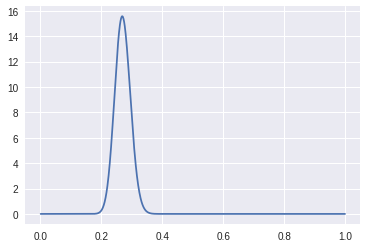

In [24]:
# Choose alpha and beta based on mean and sigma
a, b = 81, 219
beta_dist = stats.beta(a, b)
x = np.linspace(0, 1, 1002)[1:-1]
plt.plot(x, beta_dist.pdf(x))
plt.show()
# we see the mean is .27, and the beta distribution gives us a distribution around the sign-up rate

#### Updating Beta Distribution

Let's say we start a new quarter and we want to update our posterior to reflect the number of sign-ups we actually observed. The beta distribution is appropriate here because we can update it very easily. The new beta distribution is:

$\beta(\alpha_0 +$ signups$, \beta_0 +$ failed_signups)

Halfway into the second quarter, we gather some stats and see that out of 300 new visitors, we only had 100 signups. We can easily update our prior to get our new posterior distribution, ~$\beta(81 + 100, 219 + 200)$, which looks like:



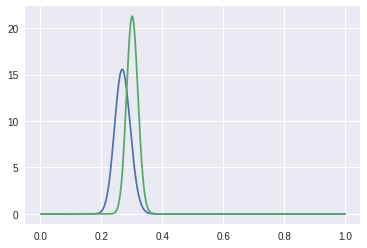

In [20]:
a2, b2 = 81 + 100, 219 + 200
beta_dist2 = stats.beta(a2, b2)
x2 = np.linspace(0, 1, 1002)[1:-1]
plt.plot(x, beta_dist.pdf(x))
plt.plot(x2, beta_dist2.pdf(x2))
plt.show()

The green curve (posterior beta distribution) has a mean of .303. The beta distribution is good because we can incorporate what we expect the probability of sign-ups to be (prior beta distribution) into the current data we observe.

#### Empirical Bayes Estimates

Use Emperical Bayes if you want to do a fair comparison between estimates derived from your data when some estimates have very few samples.

In Emperical Bayes, we estimate our prior based on observed data, whereas in Bayesian Methods (like Bayesian AB testing), we keep our prior fixed before we observe the data.


Take batting average for example. Some players bat 10 times, some bat 100s of times. How do we compare all players on an equal footing? [This is an example of Emperical Bayes Estimation](http://varianceexplained.org/r/empirical_bayes_baseball/). You compute the prior using all the data, and then multiply the prior by the likelihood of each player's batting average to get an Empirical Bayes Estimate. E.g. This graph plots the posterior batting average (Empirical Bayes) compared the actual batting average: the values less than and greater than the prior average get closer to the prior average but not lesser or greater.

*shrinkage*: all values get pushed towards the mean of the prior when we update our data with the prior. \\
![alt text](http://varianceexplained.org/figs/2015-10-01-empirical_bayes_baseball/unnamed-chunk-11-1.png)

With the new 'shrunk' data, we don't have to worry about having less counts for one player and more counts for another, since we update each players posterior performance with the overall prior average performance. However, we still want an interval rather than a point estimate around each player's batting average to quantify the uncertainty.

We can quantify uncertainty around our point estimates using *Credible intervals*. We can calculate the *credible* interval of our beta distribution, which says that some percentage (i.e. 95%) of our posterior distribution lies within a region around our point estimate by using the quantile of the beta distribution.

*Credible intervals vs. Confidence intervals*: Frequentist confidence intervals are derived from a fixed distribution, whereas credible intervals are derived from a posterior distribution that was updated by our priors. (more on this in a couple cells).

### Bayesian AB Testing

http://varianceexplained.org/r/bayesian_ab_baseball/


TLDR: You can analyze AB test results using Bayesian methods, like hypothesis testing, but you need to pick a prior.

**Example 1**

You've designed 2 different sign-up buttons, and want to test them. So, you create 2 different versions of your website where only the sign-up button is changed, version A and version B. We expect that a sign-up button's performance on our site will have success with a mean around .25 and variance .00015 using data from an existing button. We can model how we expect our buttons to perform (prior) with a beta distribution:





In [0]:
%matplotlib inline
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [28]:
alpha_0, beta_0 = _return_params_beta(mean=.15, var=.00015)
alpha_0, beta_0

(127.35, 721.65)

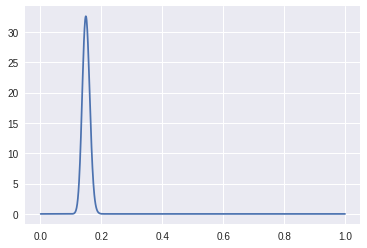

In [29]:

beta_dist = stats.beta(alpha_0, beta_0)
x = np.linspace(0, 1, 1002)[1:-1]
plt.plot(x, beta_dist.pdf(x))
plt.show()

It's been 1 month since we started our experiment and we see that for version A of our website, 100 signed up out of 985 visitors, and for version B of our website, 78 signed up out of the 600 visitors. Let's update our prior belief using this new data for version A and B. 

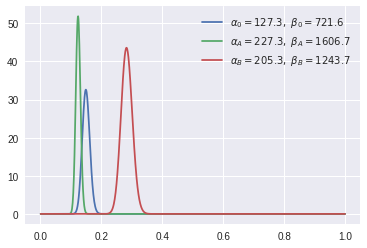

In [30]:
alpha_A, beta_A = alpha_0 + 100, beta_0 + 885
alpha_B, beta_B = alpha_0 + 78, beta_0 + 522

beta_distA = stats.beta(alpha_A, beta_A)
beta_distB = stats.beta(alpha_B, beta_B)
x2 = np.linspace(0, 0.5, 1002)[1:-1]

plt.plot(x, beta_dist.pdf(x),
         label=r'$\alpha_0=%.1f,\ \beta_0=%.1f$' % (alpha_0, beta_0))
plt.plot(x, beta_distA.pdf(x),
         label=r'$\alpha_A=%.1f,\ \beta_A=%.1f$' % (alpha_A, beta_A))
plt.plot(x, beta_distB.pdf(x2),
        label=r'$\alpha_B=%.1f,\ \beta_B=%.1f$' % (alpha_B, beta_B))
plt.legend(loc=0)
plt.show()

Based on this, we see that website B cleary looks to be a winner here. It does better than both website A and the prior.


#### Credible Intervals

TLDR: A way to summarize and express uncertainty in our posterior distribution, e.g. 95% of the posterior distribution lies within a particular region.

**Example 1 cont'd**

In the example above, how do we quantify our belief that button B is better? We could find website B's 95% credible interval by using the quantile of the beta distribution:

In [31]:
print('average stats', 78/(522+78))
print('low', stats.beta.ppf(.025, alpha_B, beta_B))
print('high', stats.beta.ppf(.975, alpha_B, beta_B))

average stats 0.13
low 0.12424278055818447
high 0.16013069007485325


#### Difference between Credible Intervals and Confidence Intervals

Credible intervals are similar to frequentist confidence intervals, but take the prior into account.

In Frequentist Statistics, there is one true population statistic that we try to estimate with samples from that population. The  confidence interval around our sample statistic is variable, and depends on our sample data. The population statistics are fixed.

In Bayesian Statistics, we assume a distribution over our population mean (prior), and we update our belief of that distribution with our data (likelihood). So the credible interval is fixed because the posterior distribution is fixed given the data we observed. But the population statistic is variable. Therefore the confidence interval is not always equal to the credible interval.

In other words, the Frequentist makes assumptions on the distribution of the sample statistic (i.e. the sample mean minus the population mean is t-distributed if we were to sample from a normally distributed population). The Bayesian makes assumptions on the distribution of the population or the prior (i.e. we've seen prior data indicating that the population mean follows this distribution).


If we have very little data, the frequentist confidence interval would be very large. The Bayesian view takes into account a prior, so the credible interval under the Bayesian perspective could be a lot smaller.


---

**Example 2**

What if we didn't have such a clear winner and our results were actually this:
for version A of our website, 185 signed up out of 970 visitors, and for version B of our website, 220 signed up out of the 1070 visitors.


127.35 721.65
312.35 1506.65
347.35 1571.65


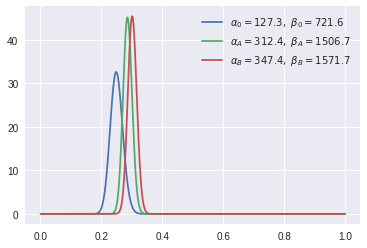

In [32]:
alpha_A, beta_A = alpha_0 + 185, beta_0 + 785
alpha_B, beta_B = alpha_0 + 220, beta_0 + 850
print(alpha_0, beta_0)
print(alpha_A, beta_A)
print(alpha_B, beta_B)


beta_distA = stats.beta(alpha_A, beta_A)
beta_distB = stats.beta(alpha_B, beta_B)
x2 = np.linspace(0, 0.6, 1002)[1:-1]


plt.plot(x, beta_dist.pdf(x2),
         label=r'$\alpha_0=%.1f,\ \beta_0=%.1f$' % (alpha_0, beta_0))
plt.plot(x, beta_distA.pdf(x2),
         label=r'$\alpha_A=%.1f,\ \beta_A=%.1f$' % (alpha_A, beta_A))
plt.plot(x, beta_distB.pdf(x2),
        label=r'$\alpha_B=%.1f,\ \beta_B=%.1f$' % (alpha_B, beta_B))
plt.legend(loc=0)
plt.show()

Is version A or B better in this case? It seems that version B is slightly better, but by how much? We can try many different approaches to arrive to a conclusion: simulation of posterior draws, numerical integration, and closed form solutions.

#### Computing Credible Intervals

##### Simulation of posterior draws

Let's use the posterior distributions to simulate 1 million draws, then compare the results in the example below:



In [33]:

sim_size = 1000000
A_sim = stats.beta.rvs(alpha_A, beta_A, size=sim_size)
B_sim = stats.beta.rvs(alpha_B, beta_B, size=sim_size)

np.sum(B_sim > A_sim) / sim_size

0.77175

So, 77% of the time, B does better, and we can conclude that there's about a 77% probability that version B is better given our posterior distribution.

##### Numerical Integration

Each posterior is an independent distribution, and we can combine them into a joint distribution. Then we can use numerical integration to find the area of the joint distribution where version B is greater than A.

Numerical integration is not a good solution when problems have multiple dimensions.
  


##### Closed-form solution:

We can also sometimes calculate the closed form solution, which is derived [here](https://www.evanmiller.org/bayesian-ab-testing.html#binary_ab_derivation) for the beta distribution:
  $$ p_A \sim \mbox{Beta}(\alpha_A, \beta_A) $$
  $$ p_B \sim \mbox{Beta}(\alpha_B, \beta_B) $$
  $${\rm Pr}(p_B > p_A) = \sum_{i=0}^{\alpha_B-1}\frac{B(\alpha_A+i,\beta_A+\beta_B)}{(\beta_B+i) 
B(1+i, \beta_B)
B(\alpha_A, \beta_A)
}$$
where $B$ is the beta function.




In [0]:
# use log beta because beta function can be less numerically stable

import math

def log_beta_func(a, b):
    beta = math.exp(math.lgamma(a) + math.lgamma(b) - math.lgamma(a+b))
    return beta

def exp_error(alpha_A, beta_A, alpha_B, beta_B):
  total_sum = 0
  for i in range(int(alpha_B - 1)):
    lnum = log_beta_func(alpha_A + i, beta_A + beta_B) 
    lden = math.log(beta_B + i) + log_beta_func(1 + i, beta_B) + \
        log_beta_func(alpha_A, beta_A)
    total_sum += math.exp(lnum - lden)
  return total_sum

1 - exp_error(alpha_A, beta_A, alpha_B, beta_B)

##### Normal Approximation

Another way to calculate this probability is by assuming the two functions are normal and calculating the probability that one distribution is greater than the other. In this case, the probability that B is greater than A is just:
$P(B<A) = P(B-A < 0) = P(X < 0)$ where $X$ is normally distributed with mean $\mu_B - \mu_A$ and variance $var_A + var_B$. The normal will not fit well with low $\alpha$ or low $\beta$.


Using the last method, we can calculate a credible interval for the difference in the two websites, by assuming the difference is normal:

In [39]:
def _return_mu_var(a, b):
  mu = a / (a + b)
  var = a * b / ((a + b) ** 2 * (a + b + 1))
  return mu, var

mu_A, var_A = _return_mu_var(alpha_A, beta_A)
mu_B, var_B = _return_mu_var(alpha_B, beta_B)

mu_diff = mu_B - mu_A
var_diff = var_A + var_B

posterior = stats.norm.cdf(0, mu_diff, var_diff)
low_estimate = stats.norm.ppf(.025, mu_diff, var_diff)
high_estimate = stats.norm.ppf(.975, mu_diff, var_diff)


print('posterior probability that B > A', 1 - posterior)
print('\n')

print('estimate', mu_diff)
print('credible interval for above estimate:')
print('lower bound', low_estimate)
print('higher bound', high_estimate)


posterior probability that B > A 1.0


estimate 0.009290504004828865
credible interval for above estimate:
lower bound 0.008986008745105292
higher bound 0.009594999264552437


## Multi-Armed Bandits for AB testing



### Epsilon Greedy

### UCB

### Thompson Sampling




### Bayesian Inference
https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/

<a id='ml'></a>
# ML
## Supervised ML

## Linear Models



http://cs231n.github.io/linear-classify/

Linear models fit linear equations to your data.

A scoring function maps your data to some outcome (class label scores or continuous variable), and a loss function measures the difference between your predicted score and ground truth so that we can keep improving the weights in the scoring function to minimize the loss function.

### Definitions

**Scoring Function:**

The scoring function maps input data to some outcome $y$.

$f(x_i, W, b) = Wx_i + b $, where

Data: $x_i \in R^D$ where $i = 1 ... N$

Labels: $y_i \in 1 ... K$, or Continuous Variable: $y_i \in R$

$W$: weights, $k$x$D$

$x_i$: data, $D$x$1$

$b$: bias, $k$x$1$


**Bias Trick**

Combine bias as an extra column in W and add an extra 1 as a row in $x_i$ so 

$$f(x_i, W) = Wx_i$$

**Loss Function**

Also called cost function or objective function. Loss functions measure the difference between our prediction and the ground truth.


### Linear Regression

Linear regression maps your data to some continuous output using a scoring function $$f(x_i, W) = Wx_i$$ and usually uses least squares to fit the model.

We need to find the coefficients W to minimize the residual sum of squares (least squares method):

$$RSS(W) = \sum_{i=1}^{n}{(y_i - Wx_i)^2}$$

When we differentiate with respect to $W$, we get the normal equations:

$$\textbf{X}^T(\textbf{y} - \textbf{X} W) = 0$$

where $\textbf{X}$ is $n$x$D$ (each row is an input vector), and $\textbf{y}$ is $n$x$1$. Solving for $W$,

$$W = (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T \textbf{y} $$


#### Why do we use least squares?
The error decomposes into recognizable quantities:
$$E[f(\textbf{X}) -  \textbf{y}] = E_X[E[(f(\textbf{X}) - y)^2 | \textbf{X}]]$$
$$= E_X[f(\textbf{X})^2 -2 f(\textbf{X})E[y|\textbf{X}] + E[y^2|\textbf{X}]]$$
$$= E_X[(f(\textbf{X}) - E[y|\textbf{X}])^2 + E[y^2|\textbf{X}] - E[y|\textbf{X}]^2]$$
$$= E_X[(f(\textbf{X}) - E[y|\textbf{X}])^2] + E[var[y|\textbf{X}]]$$
$$= E_X[f(\textbf{X}) - E[y|\textbf{X}]]^2 + (E[f(\textbf{X})^2] - E[f(\textbf{X})]^2) + E_X[var[y|\textbf{X}]]$$
$$= E_X[f(\textbf{X}) - E[y|\textbf{X}]]^2 + var[f(\textbf{X})] + E_X[var[y|\textbf{X}]]$$

= Squared bias w.r.t to data + variance of the model + inherent noise in the data.

So, minimizing least squares treats bias and variance equally in the lost function.

### Logistic Regression

Logistic regression is used for classification. The scoring function adds a softmax to the output of the linear regression:

$$f(x_i, W, b) = softmax(Wx_i + b) $$

where the Softmax function is $softmax(x) = \frac{e^x}{1 + e^x} = p(x)$. It squashes the linear regression output into a probability $\in [0, 1]$. The raw output of the classifier $Wx_i + b$ is referred to the logits or log-odds, since $log(\frac{p}{1 - p}) = Wx_i + b$.

The loss often used in logistic regression is the cross-entropy loss:

$$H(p,q) = - \sum_x p(x) \log q(x)$$

where $p(x)$ is the ground truth class distribution and $q(x)$ is the output from our classifier.


### SVM - Max-Margin Classifier

Support Vector Machine is another linear model, and uses SVM Loss. SVM wants the score of the correct class for each input to be higher than the incorrect classes by a fixed margin $\Delta$.

Let's call the score for each prediction $s$. That is, the score for the $j$-th class is $s_j = f(x_i, W)_j$. The multi-class SVM loss is:

$$ L_i = \sum_{j \neq y_i}max(0, s_j - s_{y_i} + \Delta)   $$



### Bias variance trade off

![alt text](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg)

The bias-variance tradeoff is a problem encountered in supervised learning (look at the squared-error loss decomposition in Linear Regression above). Ideally we would reduce both the variance and bias term in our model loss. Unfortunately, this is very hard to do and we often have to compromise between the bias and variance losses of our model.

Models with low bias tend to be more complex and overfit the training data by capturing the noise in the training data (they have higher variance). Models with low variance tend to be simpler and generalize better, but underfit on the training data (they have higher bias).


## Multi-Class / Multi-Label




### Multiclass classification

The output of a mutli-class classification is a single class instance per data-point. There can be more than 2 classes, but each data-point is only assigned one class label. There are some methods that are inherently multi-class, such a multi-class logistic regression and SVM. You can also use several smaller binary classifiers as follows:

#### One vs. All classification (OVA) or One vs. Rest (OVR):

Pick a technique for building binary classifiers (i.e. binary logistic regression), and build $N$ binary classifiers. For the $i$-th classifier, let positive examples be the points in class $i$, negative examples are points not in class $i$. 

If $f_i$ is the $i$-th classifier, classify with:
$$f(x) = \underset{i}{\mathrm{argmax}} f_i(x)$$

#### All vs. All classification (AVA) or One vs. One (OVO):

Build N(N-1) binary classifiers, each classifier distinguishes between a different pair of classes, i and j.

Let $f_{i,j}$ be the classifier where class $i$ are the positive examples, and class $j$ are the negative. $f_{j,i} = -f_{i,j}$. 

$$ f(x) =  \underset{i}{\mathrm{argmax}}(\sum_j f_{ij}(x))$$

#### OVO vs. AVA:
AVA requires O(N^2) classifiers, OVA requres O(N). But, each classifier in AVA has less data to classify.

## Over-fitting and Regularization

## Hyper-Parameter Tuning

## Metrics

### Accuracy

### Cross-Entropy Loss

### F1 Score - Precision/Recall


## Non-Linear Models

### Neural Nets
--DONE (i have to type up my paper notes from this)--

### Nearest Neighbors

Rarely used in practice. Take the difference of two data-points. The closer the distance metric, the more similar they are. 

For example have two images: image 1, $I_1$, and image 2, $I_2$. We can take the $L_1$ distance between the 2 images by taking the sum of difference between pixels, $p$ of each image. i.e. 

$$d(I_1, I_2) = \sum_p{|I_1^p - I_2^p|}$$

To train a nearest neighbors classifier, remember all X and y. Then when you predict for some image, return the corresponding label to the nearest image using the distance metric above.


Advantage: 
  - No time to train, just storing past results.

Disadvantage:
  - Needs space to store all the training data
  - High computational cost during test time.

#### k-Nearest Neighbor

Instead of finding the nearest image, find the top-k nearest images. k is a hyperparameter that you tune for. The probability of the label is the empirical distribution of the labels of the k neighbors.






# Unsupervised ML

## Unsupervised / Clustering / Embeddings

### K-Means
### EM
### Gaussian Mixture Model
### Dimensionality Reduction & Plotting
### Auto-encoding

## HMM and Kalman Filters

## Sequence Predictions / RNNs

## Meta-learning



# Reinforcement Learning



<a id='appliedML'></a>
# Applied ML

## Feature Engineering

### How to deal with categorical variables


Dummy Coding:

- One hot encode (see curse of dimensionality below)



Combine Levels:

- If a feature variable has too many classes, you can combine them into groups, e.g. if you have too many zip codes, combine multiple zipcodes into different districts.
- Combine levels based on the frequency of the variable, e.g. if some zipcodes are less frequent, combine them to one.
- You can combine categories by their commonalities (i.e. location or distance)



Convert to Numbers:

- Label encoders (where number for the class is between 0 and n (number of classes) - 1)
- Numeric bins, e.g. Age (0-17, 17-34, etc.)
  - Label encode them, e.g. each bin will be a different numeric bin
  - Create a new feature using mean or mode of each bin
  - 2 new features, one lower bound, another upper bound
  
If you convert categoricals to continuous variables, the meaning associated with increasing the continuous variable should translate to the same meaning with the categorical variable.




### Curse of Dimensionality


When you add categorical or continuous variables to your dataset, you will need exponentially more rows to achieve the same statistical significance.

As an example, let's say you have 2 categorical binary variables. There are 2^2 or 4 combinations. So if you had 100 evenly distributed data points, you would have an average of 25 data points per class combination. Now let's say you had 3 categorical variables. In order to have the same 25 data points per class combination, you would need 2^3 * 25 = 200 datapoints in total. We added one categorical variables to our dataset, and now we need double the data to achieve the same significance.

In other words, as you increase the number of variables, the data you need to achieve significance increases exponentially.






## Text Representations

There are many ways to represent text as numbers to be used in statistical models.


### Bag of Words

Build a fixed length vocabulary $V$ from your corpus. Assign a vector of length $V$ to new text by assigning each entry of the vector with the count of the word in the text.

### TF-IDF (term frequency - inverse document frequency)

Build a fixed length vocabulary $V$ from your corpus. We assign a score to each word that represents how 'important' this word is in your corpus.

Given some new text, we weight each word by its frequency in that text and with the inverse document frequency in a previously seen corpus.

tf = $\frac{t_d}{\sum_{d' \in{N}}{t_{d'}}}$ \\

- $t_d$ is the number of times term $t$ occurs in the document $d$. 
- The denominator is the total number of terms in the document.
- N is the number of documents. \\

idf = $ln{ \frac{N}{\text{Number of documents with term t in it}}} $ \\

Each term gets a $tfidf = tf * idf$ score, and the vector representation of the text contains the tf-idf values for each word in the vocabulary.

### Word vectors

The problem with the above vector representations of text is that if you take two words, and compute the cosine similarity, we get 0. For example, if our vocabulary contained two words, "cat" and "dog", a document with the word cat could be represented as [0, 1], and a document with the word dog could be represented as [1, 0]. If you take the dot-product, we obtain 0, although we know cats and dogs are both pets, so the similarity of the two documents should probably be bigger than 0. We will now discuss methods that fix this issue.



### Word2vec 
1 hidden layer neural network that takes in a word and its context words within a corpus, and learns a vector representation of that word.

Paper with very good explanations and derivations: https://arxiv.org/pdf/1411.2738.pdf

2 types:

- CBOW: given a window of context words surrounding a word, predict the word itself
- Skipgram: given a word, predict the surrounding context words

*Model definition:*

- Vocabulary size, $V$
- Hidden layer $\textbf{h}$, size, $N$
- Weights between input layer and hidden layer, $\textbf{W}_{VxN}$
  - Each row of $W$ is the $N$ dimensional vector representation of the $k$th word in the input layer.
  
- Weights between hidden layer and output layer $\textbf{W}'_{NxV}$
- Context window size, $C$



**CBOW**:

Architecture looks like this:

*Input layer:* Each input word from your context is a one hot encoded vector.

*Hidden layer:* Input to the hidden layer is the average of your context word vectors.

$$\textbf{h} = \frac{1}{C}\textbf{W}^T(\textbf{x}_1 + \textbf{x}_2 + ... + \textbf{x}_C) $$

This is just
$$\textbf{h} = \frac{1}{C}(\textbf{v}_{w_1} + \textbf{v}_{w_2} + ... + \textbf{v}_{w_C})^T $$

where $ w_1,... w_c$ are the words in the context and $\textbf{v}_{w_c}$ is the vector representation of input word $w_c$.

$\textbf{W}^Tx_C$ copies the $k$th row of $\textbf{W}$ to $\textbf{v}_{w_c}$.

*Output layer*:

We need to compute a score, $u_j$ for each word in the vocabulary.

$$u_j = \textbf{v}'^T_{w_j}\textbf{h}$$

where $\textbf{v}'_{w_j}$ is the $j$th column of matrix $\textbf{W}'$.

We use softmax to obtain the posterior distribution of words (which is a multinomial distribution).

$$p(w_j|w_1, ... w_C) = y_j = \frac{exp(u_j)}{\sum_{j'=1}^Vexp(u_{j'})}$$

The training objective is to maximize the above equation for the actual output word $w_O$, where $j*$ is the index of $w_O$.

$$\max p(w_j|w_1, ... w_C) = \max y_{j*}$$

The loss equation we want to minimize is:

$$E = -logp(w_O|w_1, ..., w_C) $$
$$ =  -u_{j*} + log\sum_{j'=1}^{V}{exp( \textbf{v}'^T_{w_j} \cdot h)}$$
$$ = - \textbf{v}'^T_{w_O} \cdot \textbf{h}  + log \sum_{j'=1}^{V} {\textbf{v}'^T_{w_j} \cdot \textbf{h}}$$

Update equation for hidden->output weight matrix:

$$\frac{\partial{E}}{\partial{w'_{ij}}} = \frac{\partial{E}}{\partial{u_{j}}} \frac{\partial{u_j}}{\partial{w'_{ij}}}  = e_j \cdot h_i$$
where
$$\frac{\partial{E}}{\partial{u_{j}}} = e_j = y_j - t_j$$
$t_j = \mathbb{1}(j = j^*)$.

Using SGD, the update equation looks like:

$$w'^{(new)}_{ij} =  w'^{(old)}_{ij} - \eta \cdot e_j \cdot h_i $$

or

$$v'^{(new)}_{w_j} =  v'^{(old)}_{w_j} - \eta \cdot e_j \cdot \textbf{h} $$
for $j = 1, 2, ... V$
where $\eta$ is the learning rate.

Update equation for input->hidden weight matrix:
(derivation similar, look at [the paper mentioned earlier](https://arxiv.org/pdf/1411.2738.pdf))

We need to apply the following equation to every input context word vector:

$$v^{(new)}_{w_{I, c}} =  v^{(old)}_{w_{I, c}} - \frac{1}{C} \cdot \eta \cdot EH^T $$

where $v_{w_{I, c}}$ is the input vector of the $c$ word in the input context, $\eta$ is the learning rate, $EH = \frac{\partial E}{\partial{h_i}}$

Since $EH$ is the sum of the output vectors of all words in the vocabulary weighted by their prediction error $e_j$, we can intuitively understand this update equation as adding a part of every vector to the input of the context word.

![alt text](https://i.stack.imgur.com/fYxO9.png)


Silly example that isn't real but demonstrates the math, let's check that 2 words get more similar:

In [0]:
import numpy as np

document = "Some polar bears in the Arctic are shedding pounds during the time they should be beefing up, a new study shows. It’s the climate change diet and scientists say it’s not good. They blame global warming for the dwindling ice cover on the Arctic Ocean that bears need for hunting seals each spring."
sentence1 = document.split('.')[0]

doc_dict = {}
idx_num = 0
for sentence in document.split('.'):
  sentence_tknzd = sentence.split(' ')
  for word in sentence_tknzd:
    word.strip(',')
    if word not in doc_dict:
      doc_dict[word] = idx_num
    idx_num += 1

sentence1_tknzd = sentence1.split(' ')

In [0]:
# Initialize weights matrix W, and W'
# let's give only 20 features for now:
vocab_size = len(doc_dict) + 1
num_features = 20

W = np.random.standard_normal(size=(vocab_size, num_features))

W_prime = np.random.standard_normal(size=(num_features, vocab_size))

# Set some hyperparameters of model:
learning_rate = 0.1
win_size = 3

In [110]:
# Check distance between polar and bears
polar_vec = W[doc_dict['polar']]
bears_vec = W[doc_dict['bears']]
cosine_similarity(polar_vec.reshape(1, num_features), bears_vec.reshape(1, num_features))

array([[0.3498866]])

In [0]:
# Go through 10 epochs:
for x in range(10):
  for target_idx in range(0, len(sentence1_tknzd)):
    # Get all indices
    start_idx = max(target_idx - win_size, 0)
    end_idx = min(len(sentence1_tknzd) - 1, target_idx + win_size)
    target_word = sentence1_tknzd[target_idx]
    context = [sentence1_tknzd[idx] for idx in range(start_idx, target_idx)]
    context += [sentence1_tknzd[idx] for idx in range(target_idx + 1, end_idx + 1)]

    # Input vectors:
    inp = np.array([doc_dict[c] for c in context])
    input_layer = np.zeros((len(inp), vocab_size))
    input_layer[np.arange(len(inp)), inp] = 1

    # you can just use np.mean function?
    # Average input word vectors (context) to get hidden layer.
    h = (1 / len(context)) * np.sum([np.dot(W.T, x) for x in input_layer], axis=0)

    scores = np.array([np.dot(W_prime[:, i].T, h) for i in range(vocab_size)])

    # Apply softmax
    output_layer = np.exp(scores) / np.sum(np.exp(scores), axis=0)

    # compute error e
    t_j = np.zeros(vocab_size)
    t_j[target_idx] = 1
    e = output_layer - t_j

    # Update W'
    W_prime -= np.array([learning_rate * e[j] * h for j in range(vocab_size)]).T

    # Update W
    # Only updating input context vectors
    # EH [1, 20]
    EH = np.array([np.sum(W_prime[i, :] * e) for i in range(num_features)])
    EH_weighted = EH * learning_rate * (1 / vocab_size)
    W[a] -= EH_weighted



In [119]:
polar_vec2 = W[doc_dict['polar']]
bears_vec2 = W[doc_dict['bears']]
cosine_similarity(polar_vec2.reshape(1, num_features), bears_vec2.reshape(1, num_features))

array([[0.33496195]])

It makes sense that the vectors for 'polar' and 'bears' are getting closer!

**Skip-Gram Model**

Now, our target word is at the input layer, and context at the output layer of our network.

Input layer: 
- One word, $w_I$.

Hidden layer:
- Input to the hidden layer is just the vector representation of the input word, $\textbf{v}_{w_I}$:

$$\textbf{h} = \textbf{W}^T_{(k, \cdot)} = \textbf{v}^T_{w_I}$$

Output layer:
- Instead of 1 multinomial distribution, we have C multinomial distributions. Each output uses the same weight matrix $W'$.


![alt text](https://wuciawe.github.io/files/2017-02-12-notes-on-word2vec/sg.png)

**Computational Efficiency of Word2vec**


These models have 2 vector representations (input vector $\textbf{v}_w$ and output vector $\textbf{v'}_w$ ) for each word. 

To update $\textbf{v'}_w$, we need to iterate through every word $w_j$ in the vocabulary, check the output probability $y_j$ and compare it with the expected output (1 or 0). This is very expensive!


2 solutions: (1) Hierarchical Softmax, (2) Sampling

Idea behind (1) Hierarchical Softmax:
This is an efficient way of computing softmax where we get rid of the output vector representation for words. Instead, the vocabulary is represented as a binary tree, where the words are leaves, and the probability of each word is derived from the unique path between the root and the leaf node word.
(can read paper for thorough explanation)

Idea behind (2) Negative Sampling:
Our problem is that we have too many output vectors, so let's keep the output word and just sample a few other words as negative samples. We determine the distribution empirically, and the word2vec paper defines one distribution. They also use a simplified training objective.





#### Fasttext

https://fasttext.cc

Fasttext for word embeddings is just like word2vec, except it looks at character ngrams for training as well.

So, for the word 'king' if you specified the smallest ngram to be 3 and largest to be 4, it would look at 'kin', 'ing' as well. To use 'king' as an input, we represent it using the sum of the vectors for {'kin', 'ing', 'king'} .

This is good because:
- It could generate better word embeddings for rare words, i.e. a rare word may not have many context words, but some of its character n-grams might.
- Could handle out of vocabulary words well, a word could have a vector from its character ngrams 


#### Fasttext classification

First  we average our word representations into a text representation (into the hidden layer) which is fed into a linear classifier, similar to CBOW architecture of word2vec. We still use a context-window, (this size is one of the hyperparameters). Use softmax to compute probability distribution over classes. Then minimize negative log likelihood over the classes. Train with SGD and decaying learning rate.






### Named Entity Recognition
### Part-of-Speech Tagging
### Machine Translation

IBM models (statistical machine translation), deep-learning beat the shit out of it, sequence2sequence with Attention



## Image Representations


A computer sees an image as a matrix of numbers, m pixels by n pixels. If it is an RGB image, the matrix is 3 dimensional, each dimension representing a different color channel. Each number is an integer from 0 (black) to 255 (white).

It's common to normalize pixels: get a mean image by taking the mean of all pixels in your training data, then subtract the mean image from each image. This makes your pixels lie approximately between values [-127, 127]. Could also scale input features to lie between [-1, 1].

### Issues with using raw pixels

If we use raw pixels as representations though, we have a similar problem that we did with bag-of-words representations of text. If we take the cosine similarity between two identical images, but with one image slightly translated to the right, the cosine similarity will be very different than two identical images without translation. Our representation of images should be translation invariant, and ideally rotation invariant, and should also capture a "similarity" measure that makes sense to humans visually. 



### Convolutional Neural Networks

Image representations are often learned with deep convolution neural nets. Typical datasets for learning image representations are [ImageNet](http://www.image-net.org), [Open Images Dataset](https://github.com/openimages/dataset), CIFAR, MNIST, [COCO](http://cocodataset.org/#home). Some network architectures are NASnet, ResNet, Inception models. Pre-trained architectures can be found [here](https://github.com/tensorflow/models/tree/master/research/slim/nets/nasnet) or [here](https://github.com/tensorflow/models/tree/master/research/slim). New tasks can be learned with transfer learning, fine-tuning the last layers of these architectures.


### Distance Measures





## Approximate Nearest Neighbors

If you have a large search index, approximate methods for nearest neighbor search will be more efficient. Some packages are [Annoy](https://github.com/spotify/annoy), [faiss](https://github.com/facebookresearch/faiss), etc.

TODO: describe one of these methods.


## Recommendation Algorithms



### Collaborative Filtering


### Content Based Filtering









### Cold-start


### Examples


## Putting stuff into production

To put a model into production, you should:

- Train a model and Cross-Validate your performance to ensure generalizability.
- Serialize/Deserialize the model
- Package your environment (Docker)
- Make a standard API for other to interface with your model
- Store Application logs and Service logs
- Create alerting based on latency, error counts, etc.
- Monitor how the model performs, AB-test, etc.


<a id='data'></a>
# Systems

## Data

## Parallel Computing in Python

### MPI (Message Passing Interface)

http://materials.jeremybejarano.com/MPIwithPython

You write the code for all processes in one program, and then you run the same program on all CPUs. They communicate with each other via the same program using MPI.

**Load Balancing**: this is when you are running multiple processes, and one process has more work than the others. The program is as slow as the slowest process. In order to make the program more efficient, we need to balance the workload across all processes. This is called Load Balancing.

Relational Databases (SQL)

Distributed Data Stores (Hadoop)

Distributed Computation (Spark)